# Heart Disease Prediction on UCI dataset

In [1]:
# import the data handling tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# import the models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# import the evalution tools
from sklearn .model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
# import the model tunning parameters
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# Load Data

In [5]:
df=pd.read_csv('heart_disease_data.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


# Explore the Data EDA

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.074592,0.465626,1.031199,17.523642,51.787898,0.355903,0.525425,22.886223,0.469406,1.160115,0.615717,1.021761,0.611770,0.498422
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.4 KB


In [9]:
# now check the nan values or null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Text(0, 0.5, 'Count of Patients')

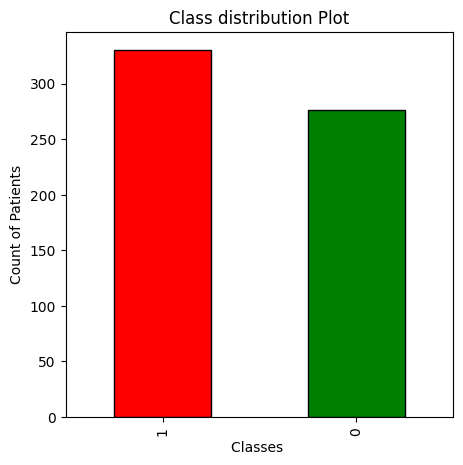

In [10]:
# --- class distribution ----
df.target.value_counts().plot(kind='bar',figsize=(5,5),color=['red','green'],edgecolor='black')
plt.title('Class distribution Plot')
plt.xlabel('Classes ')
plt.ylabel('Count of Patients')


In [11]:
# ---now explore the sex column
df['sex'].value_counts()

sex
1    414
0    192
Name: count, dtype: int64

In [12]:
# now compare with target column to know the rate in male and female
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,48,228
1,144,186


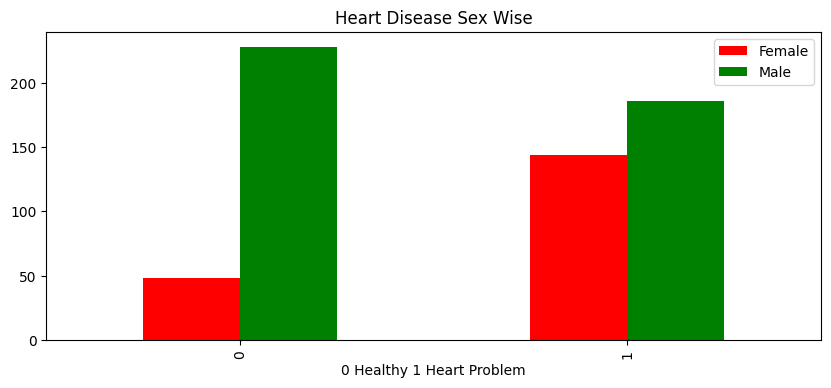

In [20]:
# ---plot the male female with heart problem ----
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['red','green'],figsize=(10,4))
plt.title('Heart Disease Sex Wise')
plt.xlabel('0 Healthy 1 Heart Problem')
plt.legend(['Female','Male'])

Text(0, 0.5, 'Counts of Patients')

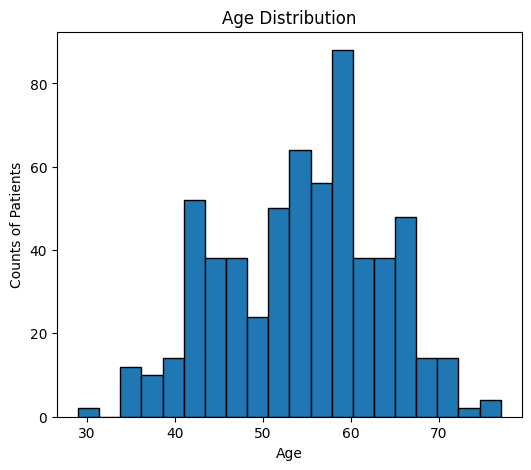

In [19]:
# --- Age Distribution Plot ---
df['age'].hist(bins=20,grid=False,edgecolor='black',figsize=(6,5))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts of Patients')

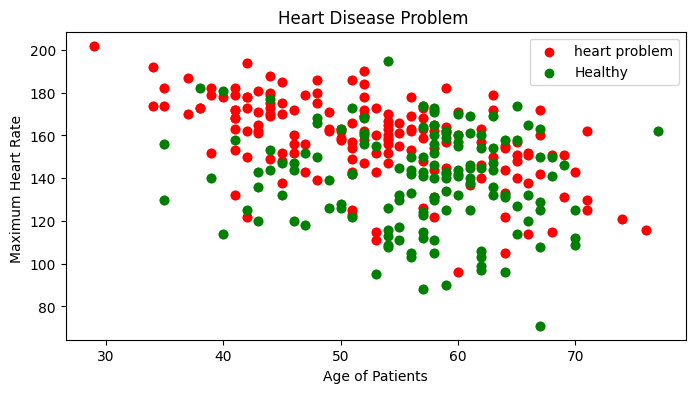

In [29]:
# --- plot  Bp vs Age ------- object oriented plot ---
fig,plot_1=plt.subplots(nrows=1,ncols=1,figsize=(8,4))
plot_1.scatter(x=df.age[df.target==1],
              y=df.thalach[df.target==1],
              c='red')
plot_1.scatter(x=df.age[df.target==0],
              y=df.thalach[df.target==0],
              c='green')
plot_1.set(
    title='Heart Disease Problem ',
    xlabel='Age of Patients',
    ylabel='Maximum Heart Rate '

)
plt.legend(['heart problem','Healthy'])

Text(0, 0.5, 'count of patients')

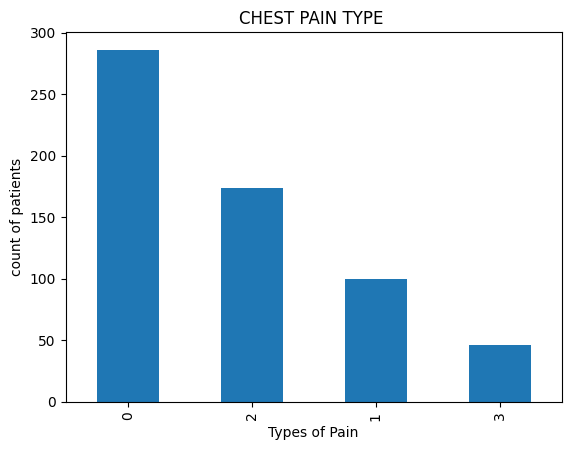

In [33]:
# --- plot chest Pain type ----
df.cp.value_counts().plot(kind='bar')
plt.title('CHEST PAIN TYPE ')
plt.xlabel('Types of Pain')
plt.ylabel('count of patients')

Text(0.5, 0, '0 Healthy  1 Heart Problem ')

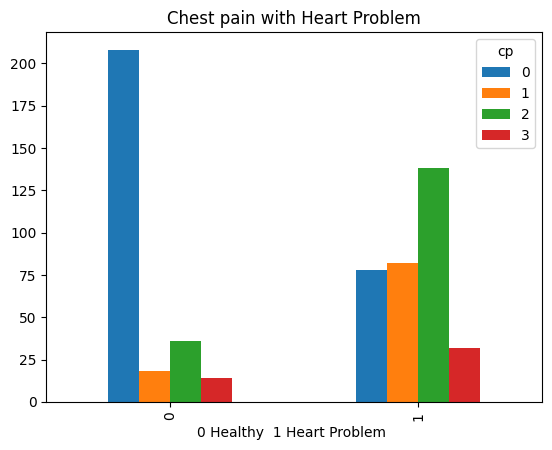

In [39]:
# ---Compare chest pain with target -----
pd.crosstab(df.target,df.cp).plot(kind='bar')
plt.title('Chest pain with Heart Problem')
plt.xlabel('0 Healthy  1 Heart Problem ')

Text(0, 0.5, 'counts of Patients')

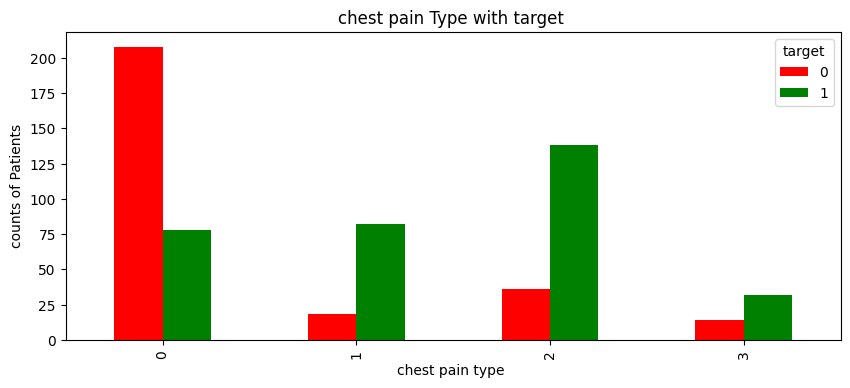

In [40]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,4),
                                 color=['red','green'])
plt.title('chest pain Type with target ')
plt.xlabel('chest pain type ')
plt.ylabel('counts of Patients')

In [41]:
# -- Corrolation Plot ----
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

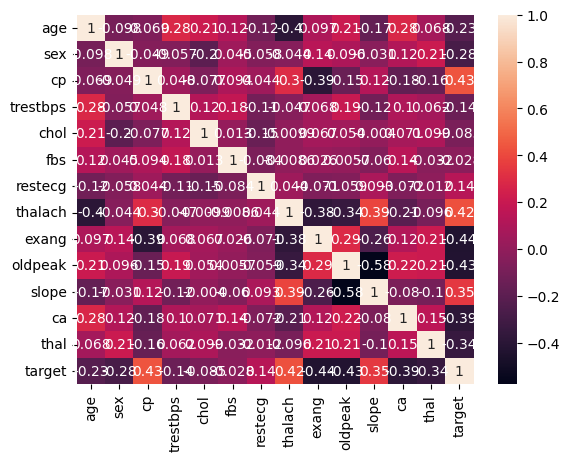

In [48]:
sns.heatmap(df.corr(),annot=True)

# Applying Machine Learning

In [49]:
# split the features and Labels 
X=df.drop('target',axis=1)
y=df['target']

In [50]:
# split into train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [52]:
# now define the models 
models={'RFC':RandomForestClassifier(),
       'LogisticRegression':LogisticRegression(),
       'KNC':KNeighborsClassifier()}

In [55]:
def fit_evaluate(models,X_train,X_test,y_train,y_test):
    models_scores={}
    for name,model in models.items():
        # fit the model 
        model.fit(X_train,y_train)
        # evaluate the score
        models_scores[name]=model.score(X_test,y_test)
    return models_scores

In [56]:
# --- Get the Models Scores -----
models_scores=fit_evaluate(models,X_train,X_test,y_train,y_test)

C:\Users\HP\Desktop\ml_projects\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
models_scores

{'RFC': 0.9672131147540983,
 'LogisticRegression': 0.8360655737704918,
 'KNC': 0.680327868852459}

In [59]:
model_dataframe=pd.DataFrame(models_scores,index=['accuracy'])

<Axes: >

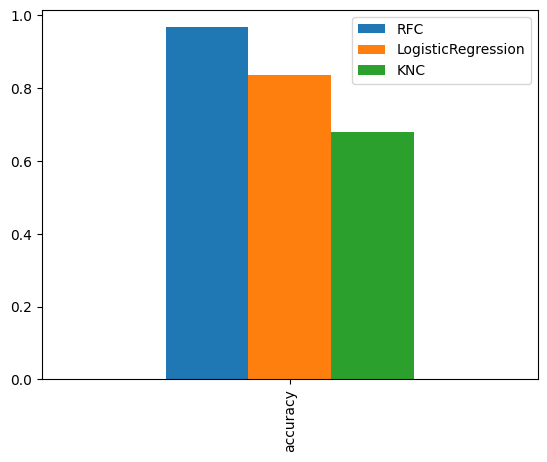

In [61]:
model_dataframe.plot(kind='bar')

In [62]:
# ---- choosing Right estimator -----
model=RandomForestClassifier()

In [63]:
# now fit the model 
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#  Model  Evalution 

In [64]:
model.score(X_test,y_test)

0.9672131147540983

In [65]:
# get the Predicatiom
y_pred=model.predict(X_test)

In [66]:
# now check the classification report and confusion metrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.97      0.97      0.97        62

    accuracy                           0.97       122
   macro avg       0.97      0.97      0.97       122
weighted avg       0.97      0.97      0.97       122



In [68]:
acc_score=accuracy_score(y_test,y_pred)

In [69]:
f1_sc=f1_score(y_test,y_pred)

In [72]:
prec_score=precision_score(y_test,y_pred)

In [78]:
scores={'accuracy_score':acc_score,
       'f1_score': f1_sc,
       'precision_score':prec_score}

In [79]:
scores_dataframe=pd.DataFrame(scores,index=['Model Scores'])
scores_dataframe

,accuracy_score,f1_score,precision_score
Model Scores,0.967213,0.967742,0.967742


<Axes: >

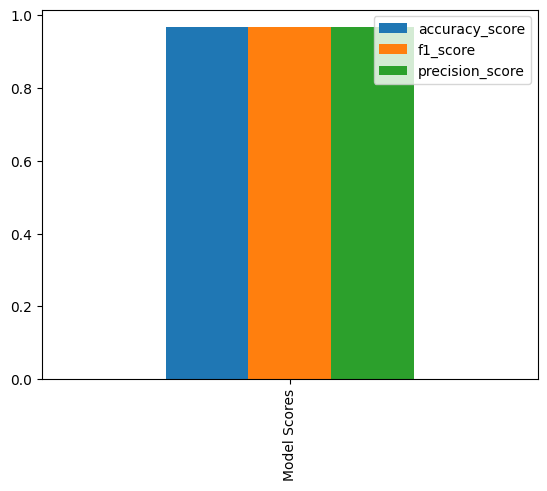

In [80]:
scores_dataframe.plot(kind='bar')

In [81]:
# --- Confusion matrix ----
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

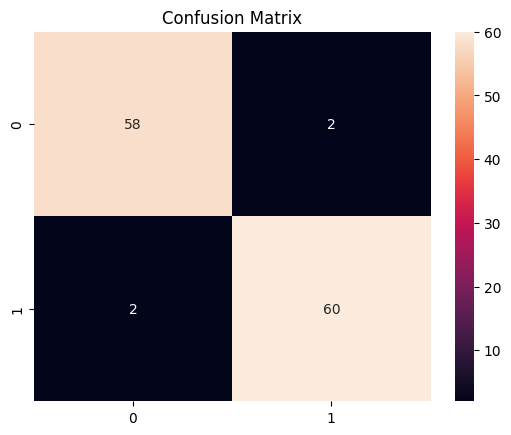

In [83]:
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')

In [105]:
# Step 1: Predicted probabilities (positive class)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 2: ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.3f}")

ROC-AUC Score: 0.994


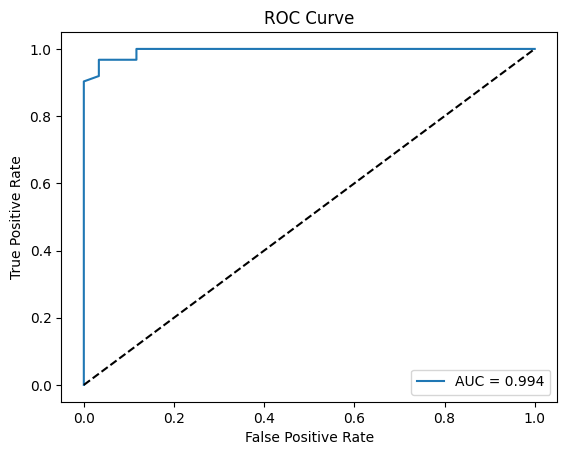

In [106]:
# Step 3: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], 'k--')  # random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [90]:
# ---- Prediction ------ 
# now do single prediction on a sample 
X_test.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [91]:
X_test[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,68,0,2,120,211,0,0,115,0,1.5,1,0,2


In [93]:
sample_test={'age':32, 'sex':1, 'cp' :2, 'trestbps':120, 'chol':211, 'fbs':0, 'restecg':0, 'thalach':120,
       'exang':0, 'oldpeak':1.5, 'slope':1, 'ca':0, 'thal':2}

In [96]:
sample_df=pd.DataFrame([sample_test])

In [98]:
pred=model.predict(sample_df)

In [101]:
print(pred[0])

1


In [102]:
# --- Saved Model ------ 
import pickle
with open('Heart disease prediction.pkl','wb') as file:
    pickle.dump(model,file)
print('Model Saved Successfully')

Model Saved Successfully


In [103]:
# ---- END------